In [54]:
import emoji
import pandas as pd

In [20]:
import pickle, os
fullfile = os.path.expanduser("~/Dropbox/insight/Google/"+'Song99Qs.p')
with open(fullfile, 'rb') as fp:
    Q = pickle.load(fp)

In [149]:
def parse_content(res):
    
    # res.keys() = ['kind', 'items', 'queries', 'searchInformation', 'context', 'url']  
    items = res['items']
    strList = [];
    for ii in range(len(items)):
        item = items[ii]
        # dict_keys(['kind', 'title', 'htmlTitle', 'link', 'displayLink', 'snippet', 'htmlSnippet', 'cacheId', 'formattedUrl', 'htmlFormattedUrl', 'pagemap'])
        string = item['title'] + item['snippet']
        strList.append(string)
    # df = pd.DataFrame(strList)
    return strList

In [59]:
def parse_return(res):
    # import pandas as pd
    # res.keys() = ['kind', 'items', 'queries', 'searchInformation', 'context', 'url']  
    items = res['items']
    strList = [];
    for ii in range(10):
        item = items[ii]
        # dict_keys(['kind', 'title', 'htmlTitle', 'link', 'displayLink', 'snippet', 'htmlSnippet', 'cacheId', 'formattedUrl', 'htmlFormattedUrl', 'pagemap'])
        strList.append(ii+1)
        strList.append(item['title'])
        strList.append(item['snippet'])
        strList.append(item['formattedUrl'])
        strList.append('~~~~~~~~~~~~~~~~~~~~~')
        
    df = pd.DataFrame(strList)
    return df

In [89]:
def parse_return_annotated(res,labels):
    # import pandas as pd
    # res.keys() = ['kind', 'items', 'queries', 'searchInformation', 'context', 'url']  
    items = res['items']
    strList = [];
    for ii in range(10):
        item = items[ii]
        # dict_keys(['kind', 'title', 'htmlTitle', 'link', 'displayLink', 'snippet', 'htmlSnippet', 'cacheId', 'formattedUrl', 'htmlFormattedUrl', 'pagemap'])
        header = str(ii+1) + " " + str(labels[ii])
        strList.append(header)
        strList.append(item['title'])
        strList.append(item['snippet'])
        strList.append(item['formattedUrl'])
        strList.append('~~~~~~~~~~~~~~~~~~~~~')
        
    df = pd.DataFrame(strList)
    return df

In [56]:
song_names = list(Q.keys())
print(song_names[0:10])
print(len(song_names))

['Shape of You', 'Despacito', "That's What I Like", 'Humble', 'Something Just Like This', 'Bad and Boujee', 'Closer', 'Body Like a Back Road', 'Believer', 'Congratulations']
99


In [135]:
Res = Q.get('Despacito')

df = parse_return(Res[0])
strList = parse_content(Res[0])
df

,0
0,1
1,Luis Fonsi - Despacito ft. Daddy Yankee - YouTube
2,"Jan 12, 2017 ... Despacito” disponible ya en t..."
3,https://www.youtube.com/watch?v=kJQP7kiw5Fk
4,~~~~~~~~~~~~~~~~~~~~~
5,2
6,Despacito - Wikipedia
7,Despacito is a song by Puerto Rican singer Lui...
8,https://en.wikipedia.org/wiki/Despacito
9,~~~~~~~~~~~~~~~~~~~~~


In [31]:
# load model trained from twitter data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char',
                             use_idf=False)

from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron(tol=1e-3)),
])

fullfile = os.path.expanduser("~/Dropbox/insight_side/"+'clf_0927.p') # perceptron
with open(fullfile, 'rb') as fp:
    clf = pickle.load(fp)

In [32]:
# predict: results from page 1
predicted = clf.predict(strList)
print(predicted)

[ 6 74 15  6 15  6 42 42 72  6]


In [35]:
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/"+'mySmileys.p')
with open(fullfile, 'rb') as fp:
    emoji_list = pickle.load(fp)
len(emoji_list)

75

In [48]:
emoji_list[74]

'🤓'

In [156]:
emoji.UNICODE_EMOJI["🤕"]

':face_with_head-bandage:'

In [62]:
for ix in list(predicted):
    e = emoji_list[ix]
    print(e + " " + emoji.UNICODE_EMOJI[e])

😅 :grinning_face_with_sweat:
🤓 :nerd_face:
😙 :kissing_face_with_smiling_eyes:
😅 :grinning_face_with_sweat:
😙 :kissing_face_with_smiling_eyes:
😅 :grinning_face_with_sweat:
😕 :confused_face:
😕 :confused_face:
🤡 :clown_face:
😅 :grinning_face_with_sweat:


In [91]:
def get_labels_from_predicted(predicted,emoji_list):
    labels = []
    labels_text = []
    for ix in list(predicted):
        e = emoji_list[ix]
        labels.append(e)
        labels_text.append(emoji.UNICODE_EMOJI[e])
    return labels

## For each query, get all 10 pages and sort

In [153]:
# get 10 pages, combine emojis 
# not all data have 100 results 
Labels = []
for i in range(len(Res)):
    res = Res[i]
    if 'items' in res.keys():
        strList = parse_content(res)
        predicted = clf.predict(strList)
        labels = get_labels_from_predicted(predicted,emoji_list)
        Labels = Labels + labels
    
text = " ".join(Labels)
print(text) 

😅 🤓 😙 😅 😙 😅 😕 😕 🤡 😅 😮 😞 😱 😀 😅 🤓 🤓 😅 🤡 🤓 😅 😀 😙 😞 😱 😀 😀 🤡 🤓 😅 😅 😀 😅 😞 🤓 🤓 😅 😙 😞 😅 😅 😀 😞 😅 😀 😅 🤓 🤓 😅 😅 🤓 😞 😅 🤓 😀 😙 😅 🤓 😅 🤓 😞 😅 😞 🤣 🤓 😞 😕 😀 😅 😅 😅 😙 😌 🤓 😞 😅 🤓 😀


In [158]:
#emoji.UNICODE_EMOJI("😅")
emoji.UNICODE_EMOJI["🤕"]

':face_with_head-bandage:'

In [163]:
# convert to words
textLabels = []
for e in Labels:
    textLabels.append(emoji.UNICODE_EMOJI[e])
print(textLabels)
text = " ".join(textLabels)

[':grinning_face_with_sweat:', ':nerd_face:', ':kissing_face_with_smiling_eyes:', ':grinning_face_with_sweat:', ':kissing_face_with_smiling_eyes:', ':grinning_face_with_sweat:', ':confused_face:', ':confused_face:', ':clown_face:', ':grinning_face_with_sweat:', ':face_with_open_mouth:', ':disappointed_face:', ':face_screaming_in_fear:', ':grinning_face:', ':grinning_face_with_sweat:', ':nerd_face:', ':nerd_face:', ':grinning_face_with_sweat:', ':clown_face:', ':nerd_face:', ':grinning_face_with_sweat:', ':grinning_face:', ':kissing_face_with_smiling_eyes:', ':disappointed_face:', ':face_screaming_in_fear:', ':grinning_face:', ':grinning_face:', ':clown_face:', ':nerd_face:', ':grinning_face_with_sweat:', ':grinning_face_with_sweat:', ':grinning_face:', ':grinning_face_with_sweat:', ':disappointed_face:', ':nerd_face:', ':nerd_face:', ':grinning_face_with_sweat:', ':kissing_face_with_smiling_eyes:', ':disappointed_face:', ':grinning_face_with_sweat:', ':grinning_face_with_sweat:', ':gri

In [177]:
# rank and get top 3 
import collections 
  
arr = Labels
freq = collections.Counter(arr) 

X = [] # emoji
Y = [] # count occurrence
for key, value in freq.items(): 
    X.append(key)
    Y.append(value)
    print(key + " -> " + str(value))
    
keydict = dict(zip(X, Y))
X.sort(key=keydict.get,reverse=True)
X[0:5]

😅 -> 25
🤓 -> 16
😙 -> 6
😕 -> 3
🤡 -> 3
😮 -> 1
😞 -> 10
😱 -> 2
😀 -> 10
🤣 -> 1
😌 -> 1


['😅', '🤓', '😞', '😀', '😙']

In [179]:
top3 = X[0:3]
type(top3[1])

str

In [92]:
labels = get_labels_from_predicted(predicted,emoji_list)
df2 = parse_return_annotated(Res[0],labels)
print(df2)

                                                    0
0                                                 1 😅
1   Luis Fonsi - Despacito ft. Daddy Yankee - YouTube
2   Jan 12, 2017 ... Despacito” disponible ya en t...
3         https://www.youtube.com/watch?v=kJQP7kiw5Fk
4                               ~~~~~~~~~~~~~~~~~~~~~
5                                                 2 🤓
6                               Despacito - Wikipedia
7   Despacito is a song by Puerto Rican singer Lui...
8             https://en.wikipedia.org/wiki/Despacito
9                               ~~~~~~~~~~~~~~~~~~~~~
10                                                3 😙
11  Luis Fonsi, Daddy Yankee - Despacito (Remix Au...
12  Apr 16, 2017 ... Luis Fonsi & Daddy Yankee Des...
13        https://www.youtube.com/watch?v=72UO0v5ESUo
14                              ~~~~~~~~~~~~~~~~~~~~~
15                                                4 😅
16  'Despacito' Lyrics Translated to English: It's...
17  Jul 19, 2017 ... If you'

In [102]:
text = " ".join(labels)
print(text)

😅 🤓 😙 😅 😙 😅 😕 😕 🤡 😅


In [99]:
from wordcloud import WordCloud

In [109]:
fullfile = os.path.expanduser("~/Dropbox/insight/conda_install.txt")
text = open(fullfile).read()

In [113]:
print(text)

conda install numpy scipy pandas matplotlib flask scikit-learn jupyter --yes

conda install -c conda-forge tweepy --yes

conda install -c conda-forge python-dotenv --yes




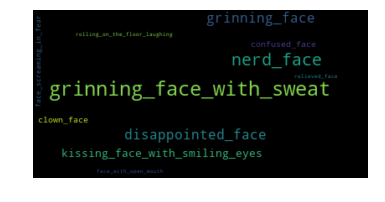

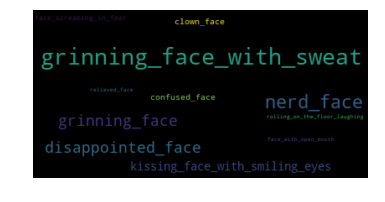

In [164]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [181]:

datetime.time

NameError: name 'datetime' is not defined

In [136]:
Q.keys()

dict_keys(['Shape of You', 'Despacito', "That's What I Like", 'Humble', 'Something Just Like This', 'Bad and Boujee', 'Closer', 'Body Like a Back Road', 'Believer', 'Congratulations', "Say You Won't Let Go", "I'm the One", 'XO Tour Llif3', 'Mask Off', 'Unforgettable', '24K Magic', 'Stay', 'Wild Thoughts', 'Black Beatles', 'Starboy', 'Location', 'Attention', "There's Nothing Holdin' Me Back", 'Bodak Yellow (Money Moves)', 'Redbone', "I Don't Wanna Live Forever", "It Ain't Me", 'iSpy', 'Issues', 'Scars to Your Beautiful', '1-800-273-8255', 'Slow Hands', 'Love on the Brain', 'I Feel It Coming', 'Bounce Back', 'Strip That Down', 'Fake Love', "Don't Wanna Know", 'Look What You Made Me Do', 'Castle on the Hill', 'Bad Things', 'Paris', 'Side to Side', 'Rockabye', 'Feel It Still', 'Let Me Love You', 'Sorry Not Sorry', 'Bank Account', "Can't Stop the Feeling!", 'Mi Gente', 'Thunder', 'T-Shirt', 'Rake It Up', 'Mercy', 'Tunnel Vision', 'Rockstar', "In Case You Didn't Know", 'Heathens', 'Now or Ne